In [ ]:
#Split data and store loader class
train, validation, test = split(data)
#Define the input size, hidden layers size, output size
input_size=10
hidden_size=40
output_size=5
#Create the neural network model  with one hidden layer and initialization fo weights
model=Sequential(linerar(input_size,hidden_layer),ReLU(),linerar(hidden_size,output_size))
model.apply(weights_init)
#Chose the suitable loss function
loss_function=loss function()
#Construct the optimizer function and initialize learning rate and momentum
optimizer=optimizer()
#Make the function using the StepLR that can decrease learning rate by half of every 10 epochs
scheduler = StepLR(optimizer,step_size=10,gamma)
# tune model hyperparameters
parameters = ...
#for params in parameters:
   model = fit(train, params)
   socre = evaluate(model, validation)

In [ ]:
# evaluate final model for comparison with other models
# #Consider to overfitting the model with training set which can explain the selected model are fitted the dataset
for eopch in range(100):
    epoch_loss=0.0
    for i, data in enumerate(data_loader):
    # Retrieve inputs and label for the batch
        x_batch, y_batch = data
    #Zero the parameter gradients
    # forward pass
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
     # backward pass
        loss.backward()
    # SGD update
        optimizer.step()
    # update statistics
        epoch_loss += loss.item()
    # print error
    print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
   # tell scheduler to consider updating learning rate
    scheduler.step()

#Measuring the performance of trained models
print(f'accuracy of training set: {accuracy(model(training set))},accuracy of test set: {accuracy(model(training set))}')
plot(epoch_loss)
plot(epoch_loss_test)
# reduce the error
 # add the model capacity
 model=model=Sequential(linear(input_size,hidden_layer),ReLU(),linear(hidden_size,hidden_size),ReLU(),linear(hidden_size,output_size))
 #note((Bias-variance trade-off))
 # add the L1/L2 penalty
 loss=loss + l1_penalty
 # add the dropout
 model=Sequential(linear(input_size,hidden_layer),ReLU(),Droupout(),linear(hidden_size,output_size))
# increase the accuracy
  # feed the model more information by adding the de-code part
  model= encode + decode


2.the first category of tools that we will consider are goodness-of-fit tests, the literature includes a large family of such tests:
   Kolmogorov-Smirnov (K-S test)
   Cramer-von-Mises
   chi-square test
the second method to compare the models is to use information criterion, that act as measure of fit, allowing to rank candidate models quantitatively:
   Akaike Information Criterion (AIC)
   Bayesian Information Criterion (BIC)


3. a.Normally l will recommend the version of python and some specify package，compile the environment, some tips for solving bugs, like using the debug model of pycharm.
b. we can store the code in repositores of GitHub, we can share the .yml file update the compile environment, also sharing the sample of input to make sure the code can be used well for others.
c. Before we share code, we should refact the code, and adding the annotations to specify funciton's parameters make sure others can understand usage of code

In [1]:
import requests
from io import BytesIO
import scipy.io
import pandas as pd
import numpy as np

In [2]:
url = 'https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat'
mat = scipy.io.loadmat(BytesIO(requests.get(url).content))
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:47:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'indian_pines_corrected': array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
         [2580, 4266, 4502, ..., 1064, 1029, 1020],
         [3687, 4266, 4421, ..., 1061, 1030, 1016],
         ...,
         [2570, 3890, 4320, ..., 1042, 1021, 1015],
         [3170, 4130, 4320, ..., 1054, 1024, 1020],
         [3172, 3890, 4316, ..., 1043, 1034, 1016]],
 
        [[2576, 4388, 4334, ..., 1047, 1030, 1006],
         [2747, 4264, 4592, ..., 1055, 1039, 1015],
         [2750, 4268, 4423, ..., 1047, 1026, 1015],
         ...,
         [3859, 4512, 4605, ..., 1056, 1035, 1015],
         [3686, 4264, 4690, ..., 1051, 1012, 1020],
         [2744, 4268, 4597, ..., 1047, 1019, 1016]],
 
        [[2744, 4146, 4416, ..., 1055, 1029, 1025],
         [2576, 4389, 4416, ..., 1051, 1021, 1011],
         [2744, 4273, 4420, ..., 1068, 1033, 1010],
         ...,
       

In [3]:
with open ('dataset_description.txt','wb') as f:
    f.write(str(mat).encode('UTF-8'))

In [4]:
def sta_des(data):
    """
    :param data: array, stored each of the spectral bands
    :return: dataframe
    """
    mean=list()
    min=list()
    max=list()
    median=list()
    var=list()
    std=list()
    bands=list()
    df=pd.DataFrame()
    for i in range(data.shape[2]):
        a=np.array(data[:,:,i])
        mean.append(np.mean(a))
        std.append(np.std(a))
        min.append(np.min(a))
        max.append(np.max(a))
        median.append(np.median(a))
        var.append(np.var(a))
        bands.append('band'+str(i+1))
    df['mean']=mean
    df['std']=std
    df['min']=min
    df['max']=max
    df['median']=median
    df['var']=var
    df['bands']=bands
    df.set_index('bands',inplace=True)
    return df

In [5]:
data=sta_des(mat['indian_pines_corrected'])
data

,mean,std,min,max,median,var
bands,,,,,,
band1,2957.363472,354.910267,2560,4536,2780.0,125961.297900
band2,4091.321237,230.384526,2709,5744,4106.0,53077.030029
band3,4277.502259,257.821508,3649,6361,4237.0,66471.930185
band4,4169.956671,280.754577,2810,6362,4126.0,78823.132439
band5,4516.678668,346.027754,3840,7153,4478.0,119735.206805
...,...,...,...,...,...,...
band196,1040.201141,26.452043,990,1201,1033.0,699.710553
band197,1043.370321,29.793709,992,1245,1035.0,887.665098
band198,1030.194816,20.864610,989,1167,1026.0,435.331940


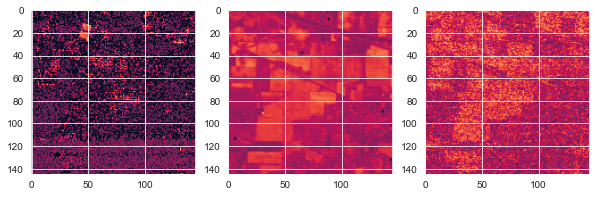

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
ax1.imshow(mat['indian_pines_corrected'][:,:,0])
ax2.imshow(mat['indian_pines_corrected'][:,:,100])
ax3.imshow(mat['indian_pines_corrected'][:,:,199])
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
scaled_data=preprocessing.scale(data)
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1, len(per_var)+1)]

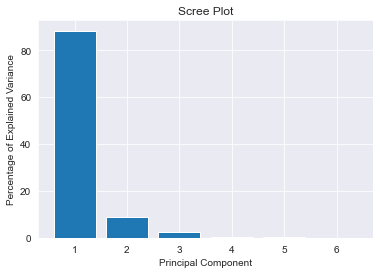

In [8]:
plt.bar(x=range(1,len(per_var)+1),height=per_var,label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

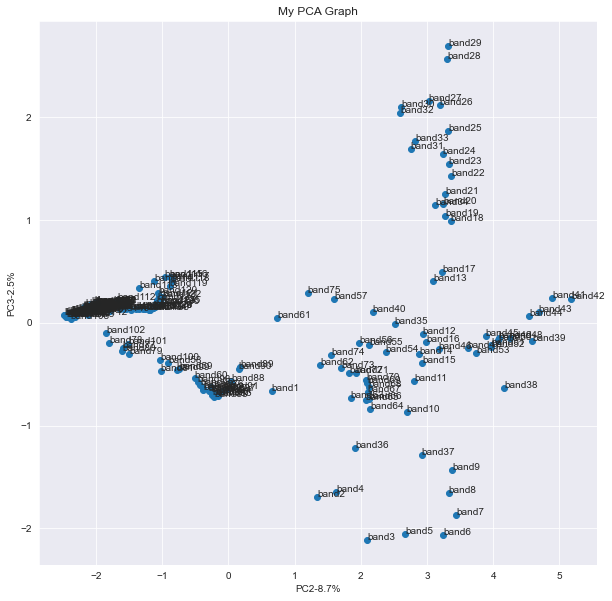

In [9]:
pca_df=pd.DataFrame(pca_data,index=data.index,columns=labels)
plt.figure(figsize=(10,10))
plt.scatter(pca_df.PC1,pca_df.PC2,)
plt.title('My PCA Graph')
plt.xlabel('PC2-{0}%'.format(per_var[1]))
plt.ylabel('PC3-{0}%'.format(per_var[2]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

An image of the screen colour coded with the magnitude of the first principal component that will re-arrange the data of the image and hence gives better contrast.

In [10]:
from sklearn.cluster import KMeans
import seaborn as sns
km=KMeans(n_clusters=16)
y_predicted=km.fit_predict(scaled_data)
data['cluster']=y_predicted

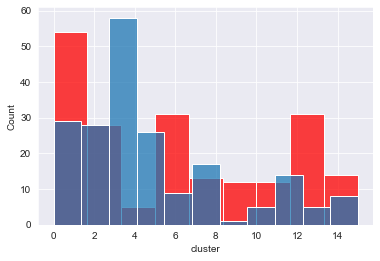

In [11]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
km=KMeans(n_clusters=16)
y_predicted_norm=km.fit_predict(scaled_df)
data['cluster_norm']=y_predicted_norm
sns.histplot(data=data,x='cluster',color='red')
sns.histplot(data=data,x='cluster_norm',)
plt.show()

After normalize the data, we can see that each cluster is more concentrated and more reasonable, the normalization is a technique that can change the values of numeric data into common scale, without distorting differences in the ranges of values or losing information.